# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [41]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.ticker import AutoMinorLocator
import pandas as pd
import numpy as np

In [10]:
browser = Browser('firefox')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [11]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [12]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [13]:
# Extract all rows of data
table = soup.find_all('tr', class_='data-row')

In [14]:
#Test data extract elements
for result in table:
    print(result.text)


2
2012-08-16
10
155
6
-75.0
739.0


13
2012-08-17
11
156
6
-76.0
740.0


24
2012-08-18
12
156
6
-76.0
741.0


35
2012-08-19
13
157
6
-74.0
732.0


46
2012-08-20
14
157
6
-74.0
740.0


57
2012-08-21
15
158
6
-78.0
740.0


68
2012-08-22
16
158
6
-77.0
740.0


79
2012-08-23
17
159
6
-76.0
742.0


112
2012-08-27
21
161
6
-74.0
741.0


114
2012-08-28
22
162
6
-74.0
742.0


123
2012-08-29
23
162
6
-75.0
741.0


134
2012-08-30
24
163
6
-75.0
742.0


145
2012-08-31
25
163
6
-75.0
743.0


156
2012-09-01
26
164
6
-76.0
745.0


163
2012-09-02
27
164
6
-75.0
743.0


170
2012-09-03
28
165
6
-75.0
745.0


171
2012-09-04
29
166
6
-75.0
747.0


172
2012-09-05
30
166
6
-74.0
747.0


173
2012-09-06
31
167
6
-74.0
745.0


175
2012-09-08
33
168
6
-73.0
748.0


176
2012-09-10
34
168
6
-73.0
748.0


177
2012-09-11
35
169
6
-73.0
749.0


178
2012-09-12
36
169
6
-73.0
750.0


179
2012-09-13
37
170
6
-73.0
750.0


180
2012-09-14
38
171
6
-73.0
750.0


181
2012-09-15
39
171
6
-75.0
751.0


182
2012-09-16
40
17

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [15]:
# Create an empty list
mars_weather_data = []
# Loop through the scraped data to create a list of rows
for mars_table in table:
    data = mars_table.find_all('td')
    # appending the column headers to mars data
    data_row = []
    for i in range(0, 7):
        data_row.append(data[i].text)
    mars_weather_data.append(data_row)

#Test and display the columns
mars_weather_data[:10]

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']]

In [16]:
# Create a Pandas DataFrame by using the list of rows 
# Creating a list of the column names
columns_titles = ['id', 'terrestrial_date', 
           'sol(martian days)',
           'ls (longitude)',
           'month',
           'min_temp',
           'pressure']

mars_df = pd.DataFrame(mars_weather_data, columns = columns_titles)

In [17]:
# Confirm DataFrame was created successfully
##Displaying the first 5 entries to verify data
mars_df.head()

,id,terrestrial_date,sol(martian days),ls (longitude),month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [18]:
# Examine data type of each column 
#before converting datatypes
mars_df.dtypes

id                   object
terrestrial_date     object
sol(martian days)    object
ls (longitude)       object
month                object
min_temp             object
pressure             object
dtype: object

In [19]:
# Change data types for data analysis
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
mars_df[['sol(martian days)','ls (longitude)','month']] = mars_df[['sol(martian days)','ls (longitude)','month']].astype('int64')
mars_df[['min_temp','pressure']] = mars_df[['min_temp','pressure']].astype('float64')

In [20]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                           object
terrestrial_date     datetime64[ns]
sol(martian days)             int64
ls (longitude)                int64
month                         int64
min_temp                    float64
pressure                    float64
dtype: object

In [21]:
# Test Display DataFrame after datatype changes
mars_df.head()

,id,terrestrial_date,sol(martian days),ls (longitude),month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [22]:
# 1. How many months are there on Mars?
# These are the count of data collected per month
mars_by_month = mars_df.groupby('month')['month'].count()
mars_by_month

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [23]:
# 2. How many Martian days' worth of data are there?
mars_by_month.sum()

1867

In [45]:
# 3. What is the average low temperature by month?
avg_low_temp = mars_df.groupby('month')['min_temp'].mean()
avg_low_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

In [61]:
# Function for creating an bar plots
def barplot(x, y, title):
    style.use('fivethirtyeight')
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.bar(x, y)
    ax.set_title(title)
    ax.set_xlabel(f'Chart By Month')
    ax.set_xticks(x)
    if 'mars temperature by martian month' in title.lower():
        ax.set_ylabel('Min Temperature (\N{DEGREE SIGN}F)')
        ax.set_yticks(np.arange(0, -91, -10))
        figname = 'Resources/mars_min_temp.png'
    elif 'mars atmospheric pressure' in title.lower():
        ax.set_ylabel('Pressure')
        ax.set_yticks(np.arange(0, 1001, 100))
        figname = 'Resources/mars_pressure.png'
    elif 'sorted mars temperature by martian month' in title.lower():
        ax.set_ylabel('Min Temperature (\N{DEGREE SIGN}F)')
        figname = 'Resources/mars_min_temp_sorted.png'
    else:
        ax.set_ylabel(f'{title.split()[1]} {title.split()[2]} (sols)')
        figname = 'Resources/mars_elapsed_sol.png'
    # Save the figure.
    fig.savefig(figname, bbox_inches='tight', facecolor='w')
    # Show Figure
    plt.show()

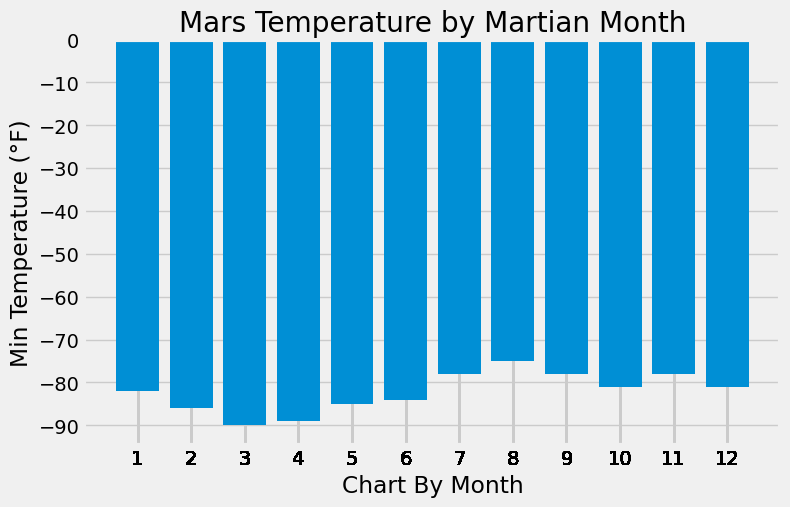

In [62]:
# Plot the average temperature by month

barplot(mars_df['month'], 
        mars_df['min_temp'],
       'Mars Temperature by Martian Month')

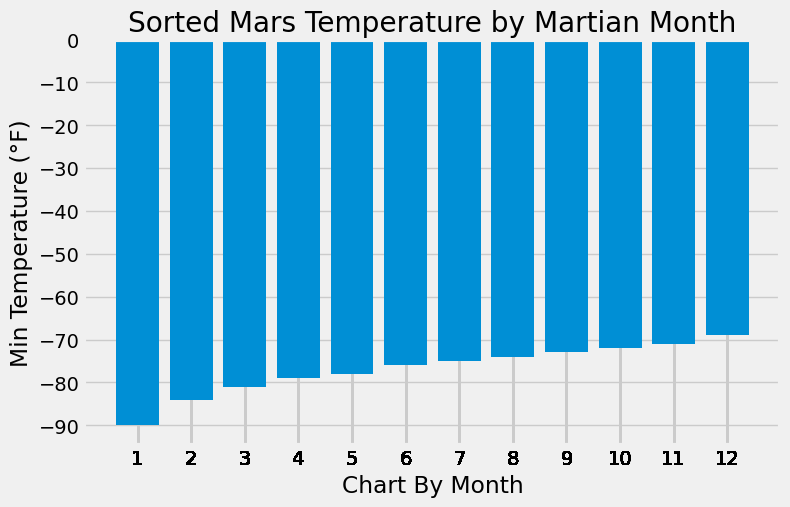

In [63]:
#Replotting the charts in the sorting order

month_sorted = mars_df['month'].sort_values(ascending=True)
min_temp_sorted = mars_df['min_temp'].sort_values(ascending = True)

#Print out the plot in sorted order
barplot(month_sorted, min_temp_sorted, 'Sorted Mars Temperature by Martian Month')


In [64]:
# 4. Average pressure by Martian month
avg_pressure = mars_df.groupby('month')['pressure'].mean()
avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

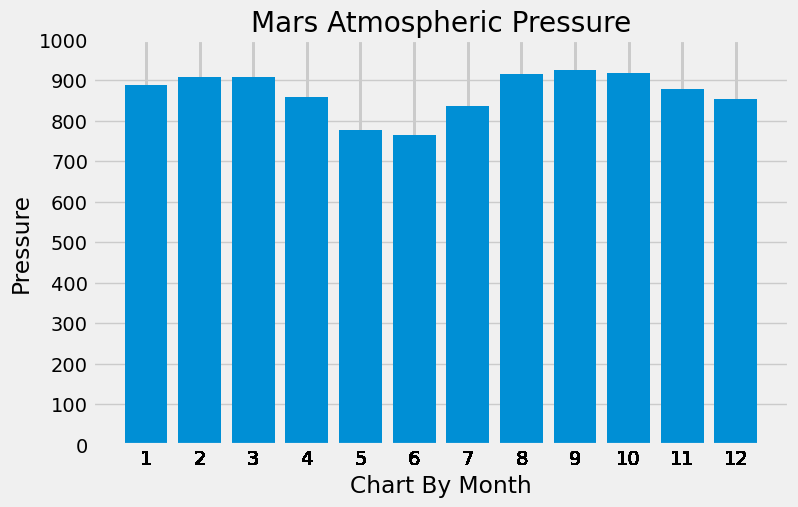

In [65]:
# Plot the average pressure by month
barplot(mars_df['month'], mars_df['pressure'], "Mars Atmospheric Pressure")

Calculating the Earth Days that goes around the sun

In [29]:
# Creating an variable to copy the dataframe columns 'terrestrial date'
terr_date_copy_df = mars_df[['terrestrial_date']].copy()
# Test to validate the df was copied
terr_date_copy_df

,terrestrial_date
0,2012-08-16
1,2012-08-17
2,2012-08-18
3,2012-08-19
4,2012-08-20
...,...
1862,2018-02-23
1863,2018-02-24
1864,2018-02-25
1865,2018-02-26


In [30]:
#create an starting point for the terrestrial date from 2012-08-16 using integer indexing iloc
start_terr_date = terr_date_copy_df['terrestrial_date'].iloc[0]
#verified the timestamp from the starting index 
start_terr_date

Timestamp('2012-08-16 00:00:00')

In [31]:
#add an new column call terrestrial days which counts the number of days 
#calculates by subtracting the terrestrial_date from the start_terr_date
terr_date_copy_df['terrestrial_days'] = (terr_date_copy_df['terrestrial_date'] - start_terr_date).dt.days
#verify the terr days displaying
terr_date_copy_df

,terrestrial_date,terrestrial_days
0,2012-08-16,0
1,2012-08-17,1
2,2012-08-18,2
3,2012-08-19,3
4,2012-08-20,4
...,...,...
1862,2018-02-23,2017
1863,2018-02-24,2018
1864,2018-02-25,2019
1865,2018-02-26,2020


In [32]:
# creating an variable to store the longitude index position 0 which is the value of 155
# the longitude of 155 is the calculated distance which is the original position to the sun 
long_inital_pos = mars_df['ls (longitude)'].loc[0]
long_pos_to_sun = mars_df.loc[mars_df['ls (longitude)'] == long_inital_pos]
#displays the data with the longitude of 155 which is the original position to the sun
long_pos_to_sun

,id,terrestrial_date,sol(martian days),ls (longitude),month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
598,621,2014-07-03,678,155,6,-77.0,739.0
599,624,2014-07-04,679,155,6,-77.0,738.0
1249,1274,2016-05-20,1346,155,6,-75.0,737.0
1250,1277,2016-05-21,1347,155,6,-75.0,736.0


In [33]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# Calclulate the terrestrial and sol to retrive the results

one_martian_year = long_pos_to_sun['terrestrial_date'].iloc[1] - long_pos_to_sun['terrestrial_date'].loc[0]
print(f"One full Martian Year equals to, {one_martian_year} in earth days ")

One full Martian Year equals to, 686 days 00:00:00 in earth days 


In [34]:
#Plotting the results using the dataframe terr_date_copy_df which includes minimum temperature and terrestrial days
#creating function for plot configuration
def plot2D(x, y, title):
    plt.rc('lines', linewidth=2, color='r')
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_title(title, fontsize=18)
    ax.set_xlabel('Sol (in Martian Days)',fontsize=14)
    ax.set_ylabel('Min Temperature (\N{DEGREE SIGN}F)', fontsize=14)
    ax.set_xticks(np.arange(0, 2001, 200))
    ax.xaxis.set_minor_locator(AutoMinorLocator(4))
    ax.tick_params(axis='x', which='minor', bottom=False)
    ax.set_yticks(np.arange(-60, -96, -5))
    ax.grid(which='major')
    ax.plot(x, y, 'o')
    # Save the figure.
    figname = 'Resources/temp_days_plot.png'
    fig.savefig(figname, bbox_inches='tight', facecolor='w')
    # Show Figure
    plt.show()

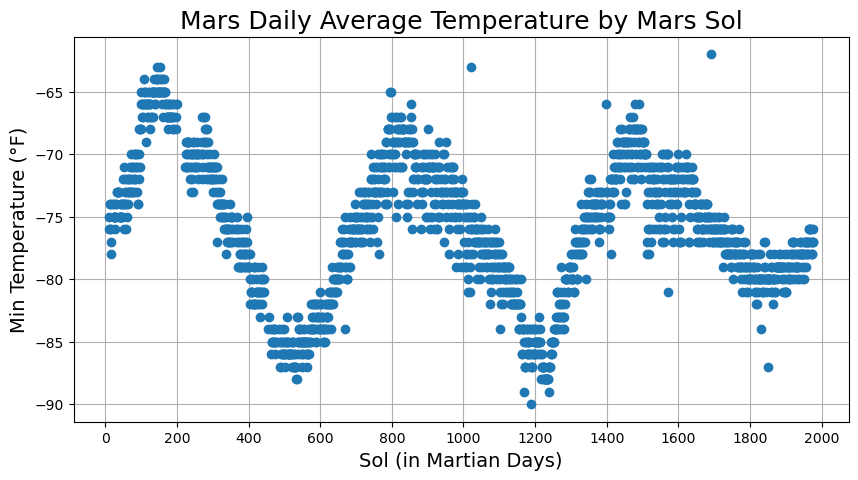

In [35]:
plot2D(mars_df['sol(martian days)'], mars_df['min_temp'], 'Mars Daily Average Temperature by Mars Sol')


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [53]:
# Write the data to a CSV
file_name = 'Resources/mars_data.csv'
mars_df.to_csv(file_name, index=False)

In [54]:
browser.quit()